## Pymaceuticals Student Analysis 

In [108]:
%matplotlib inline

In [109]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np 
from pathlib import Path 

In [110]:
# Load CSV files
mouse_metadata_csv = Path("Resources/Mouse_metadata.csv")
study_results_csv = Path("Resources/Study_results.csv")

In [111]:
# Read metadata and results data files and store them in DataFrames 
mouse_metadata = pd.read_csv(mouse_metadata_csv)
study_results = pd.read_csv(study_results_csv)

In [112]:
# Combine data files into a single dataset 
complete_study_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
complete_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [113]:
# Find number of unique mice 
mice_count = complete_study_data["Mouse ID"].nunique()
mice_count

249

In [114]:
# Find duplicate mice by ID number that shoes up for Mouse ID and Timepoint 
duplicate_id = complete_study_data[complete_study_data[["Mouse ID", "Timepoint"]].duplicated(keep=False) == True] 
duplicate_id["Mouse ID"].unique()

array(['g989'], dtype=object)

In [115]:
# Optional: get all data for the duplicate Mouse ID 
duplicate_data = complete_study_data.loc[complete_study_data["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [116]:
# Create clean DataFrame by dropping the duplicate mouse by its ID
complete_study_data.rename(columns={"Mouse ID": "Mouse_ID"},inplace=True)
clean_study_data = complete_study_data[complete_study_data.Mouse_ID != "g989"]
clean_study_data.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [117]:
# Check number of mice in clean DataFrame
clean_study_data["Mouse_ID"].nunique()

248

## Summary Statistics 

In [118]:
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
mean_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Combine stats calculations into single DataFrame
stats_summary_table = {"Mean Tumor Volume": mean_tumor_vol, 
                       "Median Tumor Volume": median_tumor_vol, 
                       "Tumor Volume Variance": variance_tumor_vol, 
                       "Tumor Volume Std. Dev.": std_dev_tumor_vol, 
                       "Tumor Volume Std. Err.": std_err_tumor_vol}

stats_summary_table_df = pd.DataFrame(stats_summary_table)

# Display the DataFame
stats_summary_table_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [119]:
# do aggregate method? OPTIONAL
# mean_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean() ["Tumor Volume (mm3)"].median() ["Tumor Volume (mm3)"].var() ["Tumor Volume (mm3)"].std() ["Tumor Volume (mm3)"].sem()

## Bar and Pie Charts

In [140]:
# Generate a bar plot showing total number of rows (Mouse ID/Timepoint) for each drug regimen using Pandas
drug_timepoints = clean_study_data.groupby(["Drug Regimen"])["Timepoint"].count()
drug_timepoints=drug_timepoints.sort_values(ascending=False)
drug_timepoints

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Timepoint, dtype: int64

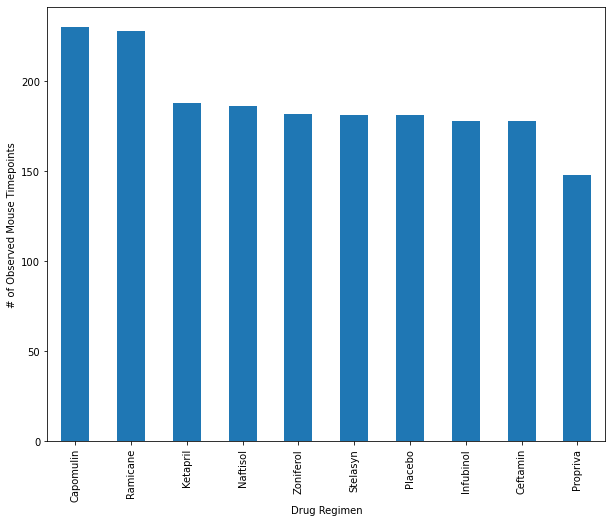

In [141]:
drug_chart = drug_timepoints.plot(kind="bar", figsize=(10,8))
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

In [ ]:
# Generate a bar plot showing total number of rows (Mouse ID/Timepoint) for each drug regimen using Pyplot

